In [32]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [42]:
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

In [43]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [44]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [45]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [46]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()


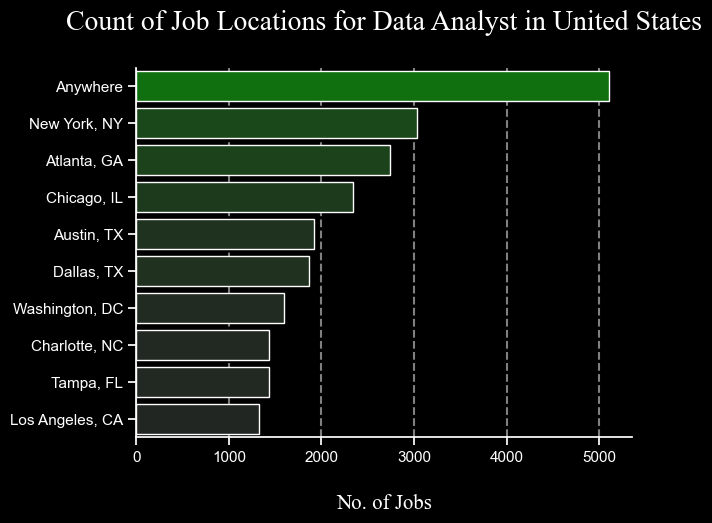

In [94]:
sns.set_theme(style='ticks')
plt.style.use('dark_background')
plt.grid(True, color='grey', linestyle='--', linewidth = 1.5)

sns.barplot(data=df_plot, x='count', y='job_location', hue = 'count', palette='dark:green', legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst in United States\n', font ='Times New Roman', fontsize= 20)
plt.xlabel('\nNo. of Jobs',  font ='Times New Roman', fontsize= 15)
plt.ylabel("")
plt.tight_layout
plt.show()

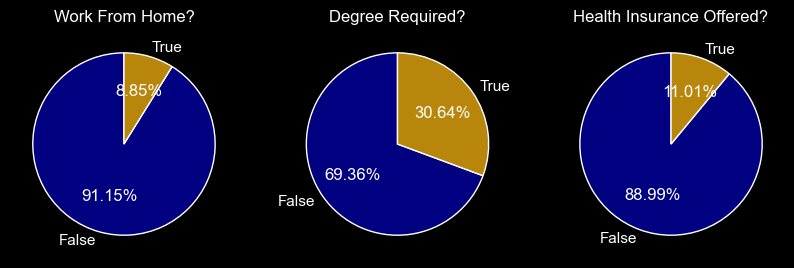

In [95]:
dict_col = {
    'job_work_from_home' : 'Work From Home?',
    'job_no_degree_mention' : 'Degree Required?',
    'job_health_insurance': 'Health Insurance Offered?'
}

# colors = [['midnightblue', 'darkgoldenrod'], [], ['darkblue', 'darkgoldenrod']]


fig, ax = plt.subplots(1, 3, figsize=(10, 6))

for i, (col, title) in enumerate(dict_col.items()):
    # print(i, " ", col," ", title)
    ax[i].pie(df[col].value_counts(), 
              startangle = 90, 
              autopct= '%1.2f%%', 
              colors = ['navy', 'darkgoldenrod'],
              labels = ['False', 'True']) # Please ensure the roder of the labels in which you write them
    ax[i].set_title(title)

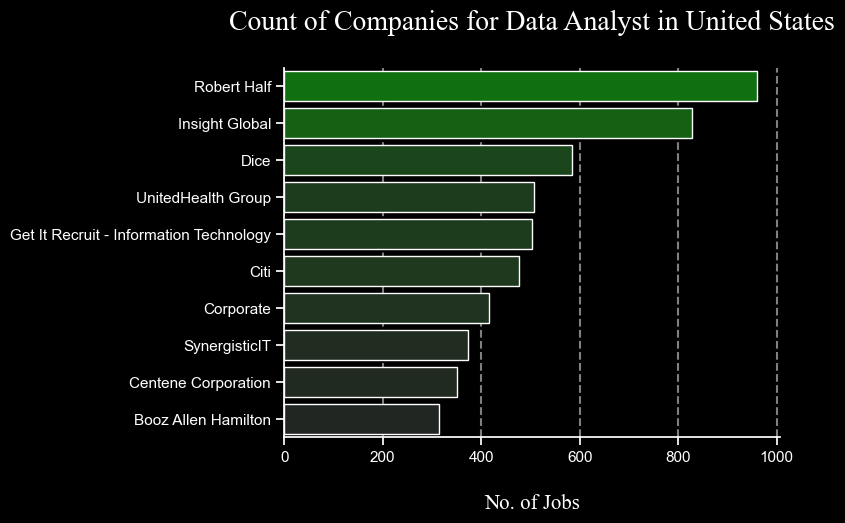

In [96]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
plt.style.use('dark_background')
plt.grid(True, color='grey', linestyle='--', linewidth = 1.5)

sns.barplot(data=df_plot, x='count', y='company_name', hue = 'count', palette='dark:green', legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst in United States\n', font ='Times New Roman', fontsize= 20)
plt.xlabel('\nNo. of Jobs',  font ='Times New Roman', fontsize= 15)
plt.ylabel("")
plt.tight_layout
plt.show()